# <center>What Aspects Contribute Most To Victory in Professional Tennis</center>

<div>

</div>

## Overview:
If you are a tennis player, you have probably heard the saying "The serve is the most important part of the game!" It's the only shot that the opponent has no influence on, so you can start the point offensively if you are the one serving. I wanted to find out if it truly was the most important shot, and if it wasn't, what is? To understand this, I compared the serve game (first serve percentages and first points won) of professional tennis players with their rank. Next, a KNN learning model was created to predict a player's winning or losing outcome in a match based on many different factors. From there, the permutation importance was calculated for each feature of the model to determine how each feature was weighted in the predicted model. To further understand the features that contribute the most to a player's victory, I displayed the paritial dependence of the top two features with the greatest permutation importance.

## Data Discovery:


#### ATP Serve Stats:
Tennis Abstract: ATP Match Results, Splits, and Analysis. (n.d.). Www.tennisabstract.com.     https://www.tennisabstract.com/cgi-bin/leaders.cgi


#### WTA Serve Stats:
Tennis Abstract: WTA Match Results, Splits, and Analysis. (n.d.). Www.tennisabstract.com. Retrieved April 8, 2024, from https://www.tennisabstract.com/cgi-bin/leaders_wta.cgi


#### ATP Match Data:
Tennis_ML_Game_Strategy/all_matches.csv at master · amindazad/Tennis_ML_Game_Strategy. (n.d.). GitHub. Retrieved April 8, 2024, from https://github.com/amindazad/Tennis_ML_Game_Strategy/blob/master/all_matches.csv

### Data Implementation:
For the serve data on the top 50 ATP and WTA players, I copied and pasted the table into an excel sheet to download as a csv, then load the data as a csv. For the ATP match data, I downloaded the csv from GitHub and also load the data as a csv.

In [20]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
def remove_percent_sign(cell):
    """
    Function: remove_percent_sign
    Parameters: cell (of a dataframe)
    Returns: a cell with a string without a percent sign
    """
    # check if the cell is a string
    if isinstance(cell, str):
        # remove percent sign
        return cell.replace("%", "")
    
    return cell

In [3]:
def load_serve_data(filename):
    """
    Function: get_data
    Parameters: filename
    Returns: dataframe from csv file
    """
    # load csv as dataframe
    df = pd.read_csv(filename)
    # apply function to remove percent signs
    df = df.applymap(remove_percent_sign)
    
    return df

In [4]:
# dataframe of serve statistics from top 50 Men's professional tennis players
atp_df = load_serve_data("tennis data - Men's serve.csv")
atp_df

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG
0,1,Novak Djokovic [SRB],58,49-9,84.50,69.10,68.40,436,8.70,147,2.90,8.10,63.90,76.20,56.70,61.60,87.60,6.1,1.9
1,2,Jannik Sinner [ITA],76,65-11,85.50,69.10,68.00,485,8.30,137,2.40,6.00,60.50,76.80,57.20,60.90,89.60,6.1,1.9
2,3,Carlos Alcaraz [ESP],76,62-14,81.60,67.20,67.30,319,5.60,160,2.80,8.30,66.10,72.60,56.80,61.90,85.90,6.2,2.0
3,4,Daniil Medvedev [RUS],74,55-19,74.30,64.70,65.50,518,8.30,348,5.60,15.20,63.10,74.40,48.10,56.70,82.50,6.4,2.3
4,5,Alexander Zverev [GER],89,65-24,73.00,67.70,66.30,719,10.10,217,3.00,10.60,71.30,74.00,52.00,58.10,86.90,6.2,2.0
5,6,Andrey Rublev [RUS],81,58-23,71.60,67.10,65.50,607,8.90,151,2.20,5.80,61.90,75.40,53.80,57.10,86.20,6.2,2.1
6,7,Holger Rune [DEN],67,43-24,64.20,65.10,65.50,396,7.30,235,4.30,11.20,61.40,72.70,53.20,59.90,82.90,6.4,2.2
7,8,Casper Ruud [NOR],67,45-22,67.20,65.80,65.40,373,6.80,168,3.10,8.50,63.90,72.60,53.60,58.50,85.40,6.4,2.2
8,9,Grigor Dimitrov [BUL],73,53-20,72.60,68.10,67.70,540,9.70,227,4.10,10.80,62.40,77.50,52.40,58.80,86.10,6.1,2.0
9,10,Hubert Hurkacz [POL],69,46-23,66.70,70.00,65.70,1037,16.40,132,2.10,5.70,63.60,79.80,52.80,56.00,89.60,6.2,1.9


In [5]:
# dataframe of serve statistics from top 50 Women's professional tennis players
wta_df = load_serve_data("tennis data - Women's serve.csv")
wta_df

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG
0,1,Iga Swiatek [POL],84,74-10,88.10,64.60,65.40,144,2.90,137,2.80,8.10,65.90,69.90,54.30,59.10,81.60,6.2,2.2
1,2,Aryna Sabalenka [BLR],64,49-15,76.60,63.20,63.90,348,8.20,247,5.80,15.20,61.70,71.90,49.00,57.80,78.90,6.4,2.4
2,3,Coco Gauff [USA],71,55-16,77.50,59.60,61.30,261,5.70,293,6.40,16.10,60.30,69.10,45.10,53.80,72.00,6.5,2.6
3,4,Elena Rybakina [KAZ],64,50-14,78.10,62.90,61.30,412,9.80,147,3.50,8.70,59.80,73.20,47.70,52.20,79.20,6.5,2.4
4,5,Jessica Pegula [USA],64,48-16,75.00,59.90,60.50,164,4.10,143,3.60,8.50,58.40,67.60,49.20,53.80,72.60,6.4,2.6
5,6,Ons Jabeur [TUN],47,29-18,61.70,57.00,57.10,167,5.20,131,4.10,9.10,54.90,66.20,45.80,50.40,66.30,6.7,2.9
6,7,Maria Sakkari [GRE],59,35-24,59.30,59.80,60.80,192,4.70,191,4.60,11.60,59.90,67.50,48.20,54.40,73.60,6.7,2.7
7,8,Qinwen Zheng [CHN],57,38-19,66.70,59.80,60.30,345,8.70,262,6.60,13.70,51.60,73.80,44.70,51.80,72.90,6.5,2.6
8,9,Marketa Vondrousova [CZE],51,34-17,66.70,58.20,60.70,132,4.30,212,6.90,19.00,63.40,65.20,45.90,56.60,68.00,6.4,2.7
9,10,Jelena Ostapenko [LAT],62,42-20,67.70,58.80,60.40,271,5.70,302,6.30,14.80,57.60,68.70,45.40,53.30,70.90,6.7,2.7


In [86]:
def linear_regression(df, x_column, y_column, title):
    """
    Function: linear_regression
    Parameters: dataframe, x column name, y column name, title of graph
    Returns: scatterplot with linear regression, correlation coefficient, p-value
    """
    # set x and y values from dataframe columns and convert values to floats for linear regression
    x = df[[x_column]].values.astype(float)
    y = df[y_column].values.astype(float)
    
    # set x and y values from dataframe columns and convert values to floats for correlation coefficient and p-value
    x_val = df[x_column].values.astype(float)
    y_val = df[y_column].values.astype(float)
    
    # find correlation coefficent and p-value
    corr_coefficient, p_value = pearsonr(x_val, y_val)
    
    # initialize linear regression model
    model = LinearRegression()

    # fit the model to the data
    model.fit(x, y)
    
    # plot the data points
    plt.scatter(x, y, color = "yellowgreen", label = "Player")
    
    # plot the regression line
    plt.plot(x, model.predict(x.reshape(-1, 1)), color = "blue", label = "Linear Regression")
    
    # display p-value as <0.001 if rounds to 0
    p_value_str = f"{p_value:.3f}" if p_value >= 0.001 else "<0.001"
    
    # label correlation coefficient and p-value on plot
    plt.text(0.02, 0.9, f"Correlation Coefficient: {corr_coefficient:.2f} \nP-value: {p_value_str}", transform = plt.gca().transAxes)
    
    # add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)
    
    # add legend
    plt.legend()
    
    # show plot
    plt.show()

### Model Development:
The function takes any one column as the x-axis and any one column as the y-axis for a scatter plot. A linear regression is also fit to the data and plotted on the graph. Correlation coefficients and p-values are also calculated to determine how negative or positive a correlation is between two variables and if there even is a significant correlation.

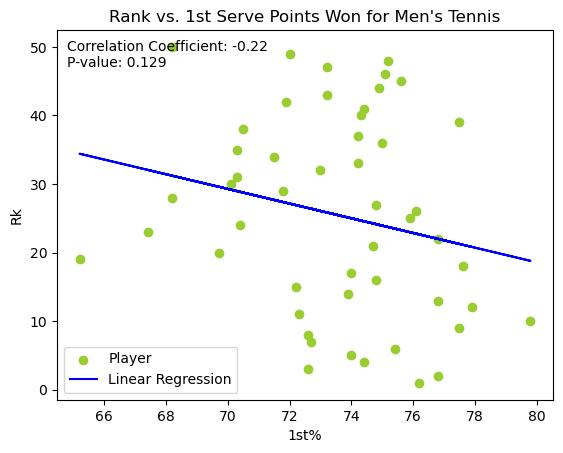

In [87]:
linear_regression(atp_df, "1st%", "Rk", "Rank vs. 1st Serve Points Won for Men's Tennis")

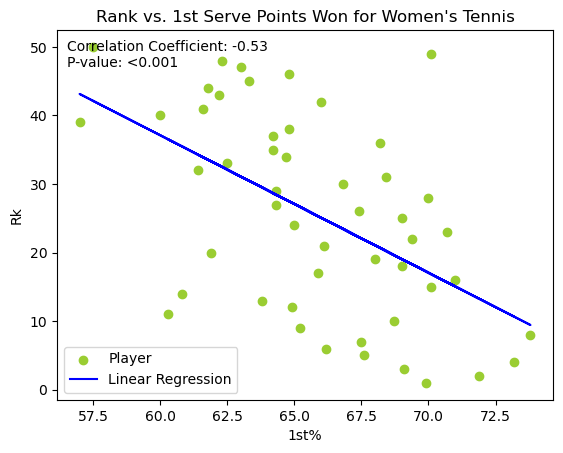

In [88]:
linear_regression(wta_df, "1st%", "Rk", "Rank vs. 1st Serve Points Won for Women's Tennis")

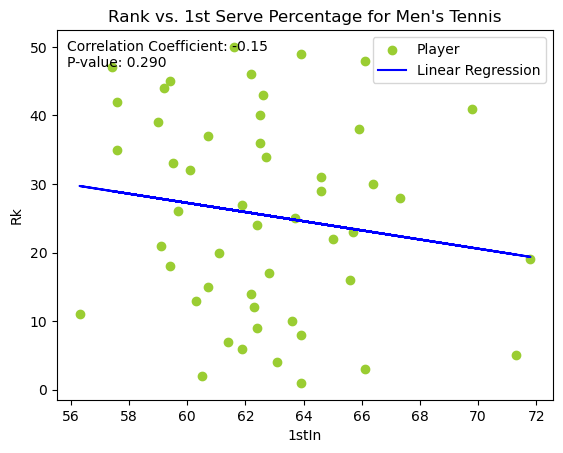

In [89]:
linear_regression(atp_df, "1stIn", "Rk", "Rank vs. 1st Serve Percentage for Men's Tennis")

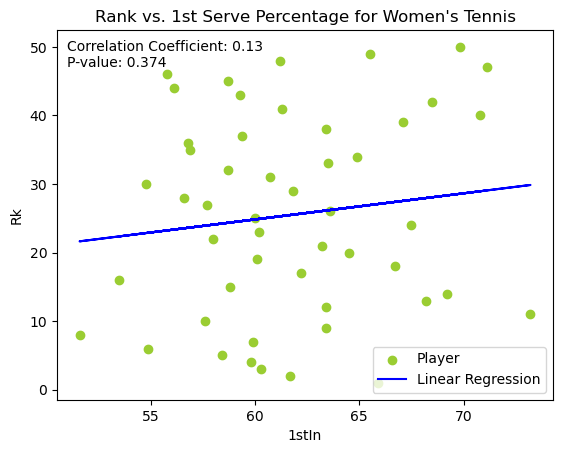

In [90]:
linear_regression(wta_df, "1stIn", "Rk", "Rank vs. 1st Serve Percentage for Women's Tennis")

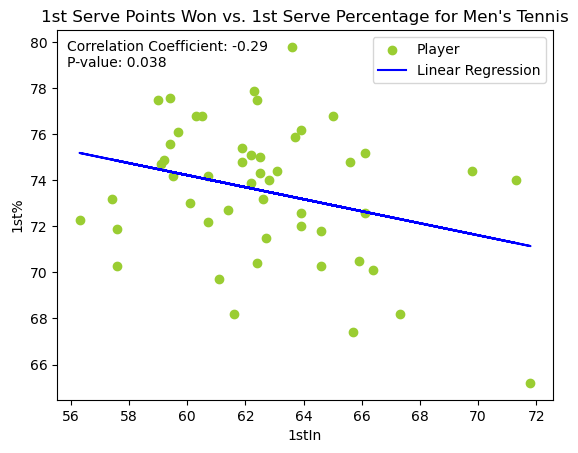

In [91]:
linear_regression(atp_df, "1stIn", "1st%", "1st Serve Points Won vs. 1st Serve Percentage for Men's Tennis")

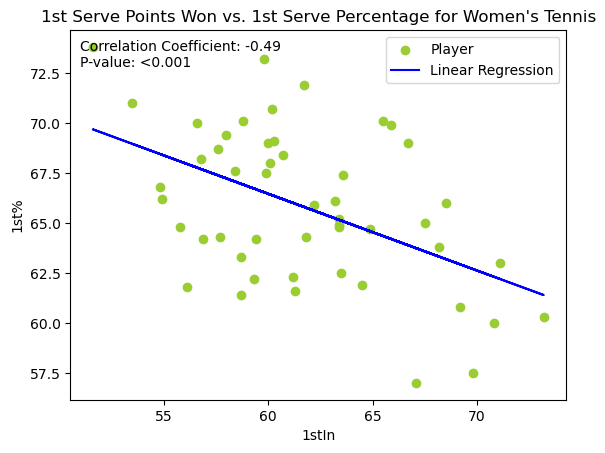

In [92]:
linear_regression(wta_df, "1stIn", "1st%", "1st Serve Points Won vs. 1st Serve Percentage for Women's Tennis")

### Data Analysis:
For the first four scatter plots for rank versus first serve points won (points won from first serve) and first serve percentage (percentage of first serves placed in out of all attempted first serves), there is no significant correlation since the p-value is greater than alpha (0.05) except for the graph representing rank versus first serve points won for women's tennis. This could be because men's and women's tennis is very different in the sense that generally men can serve their way out of trouble and women can return their way out of trouble.
The reason for this is because men serve faster so their serves are harder to return and attack. Therefore, the women who can hold serve (prevent their opponent from winning their return games), while also win their return games, tend to win more matches and thus boost their rank. In addition, a reason for why there is no correlation between rank and first serves for the other three comparisons is because players don't have to always "go for" their first serves in the pro tour because everyone is also good at returning (part of a strategy for when to "go for" serves and when to not), so even though it is an important shot in tennis, it won't necessarily be the only shot or aspect about the sport leading a player to victory. 

For the last two scatter plots for first serve points won versus first serve percentage (percentage of first serves that landed in), there is a negative correlation, meaning that as a player's first serve percentage increases, the percentage of points won from serves decreases. This could be due to the strategy behind a serve game depending on the score or competitive environment of the match. A player may not always take the greatest risks and aim for an ace, and instead, just want to place a strong serve in, focussing on placement and consistency, and put pressure on the opponent to make a good return. Therefore, it may be that a player who has a higher first serve percentage may take less "risky" serves, which in turn gives their opponent a greater chance to attack on the return.

### Limitations:
The dataset for both the ATP and WTA serve stats only contain data for the top 50 professional tennis players in the world. Even though I am only focussing on professional tennis, this is still considered a small (non-randomized) sample of data especially since there are over 1,000 players officially on each tour. To dive deeper to fully understand the scope of the first serve across a greater range of professional tennis players, I would create a graph for every 50-100 ranked player and a graph of all 1,000+ players. The separation of the ranked players in groups of 50-100 is also to account for the noticeable change in match level between the different ranks. 

In [13]:
def load_match_data(filename):
    """
    Function: load_match_data
    Parameters: filename
    Returns: dataframe with cleaned match data
    """
    
    # load csv as dataframe
    match_df = pd.read_csv(filename)
    
    # set columns to remove that are not relevant to factors contributing to a tennis player's game
    removed_columns = ["start_date", "end_date", "location", "service_games_won", "court_surface", "prize_money", 
                       "currency", "year", "player_id", "player_name", "opponent_id", "opponent_name", "tournament", 
                       "round", "num_sets", "sets_won", "games_won", "games_against", "tiebreaks_won", "tiebreaks_total", 
                       "total_points_won", "total_points", "duration", "retirement", "seed", "doubles", "masters", 
                       "round_num", "return_games_played"]
    # remove set columns
    match_df.drop(columns = removed_columns, inplace = True)
    
    # remove any rows that have NaN values
    match_df.dropna(inplace=True)
    
    # remove bias in dataset by converting stats into percentages
    match_df["ace_percentage"] = match_df["aces"] / match_df["service_points_attempted"]
    match_df["serve_percentage"] = match_df["service_points_won"] / match_df["service_points_attempted"]
    match_df["double_faults_percentage"] = match_df["double_faults"] / (match_df["double_faults"] + match_df["second_serve_points_attempted"])
    match_df["first_serve_percentage"] = match_df["first_serve_made"] / match_df["first_serve_attempted"]
    match_df["first_serve_points_percentage"] = match_df["first_serve_points_made"] / match_df["first_serve_points_attempted"]
    match_df["second_serve_points_percentage"] = match_df["second_serve_points_made"] / match_df["second_serve_points_attempted"]
    match_df["break_points_made_percentage"] = match_df["break_points_made"] / match_df["break_points_attempted"]
    match_df["break_points_saved_percentage"] = match_df["break_points_saved"] / match_df["break_points_against"]
    match_df["return_points_percentage"] = match_df["return_points_won"] / match_df["return_points_attempted"]
    match_df["first_serve_return_percentage"] = match_df["first_serve_return_points_made"] / match_df["first_serve_return_points_attempted"]
    match_df["second_serve_return_percentage"] = match_df["second_serve_return_points_made"] / match_df["second_serve_return_points_attempted"]
    
    # set columns to remove that were used to calculate percentages
    remove_columns_after_calculations = ["aces", "service_points_attempted", "first_serve_return_points_made", 
                                         "first_serve_return_points_attempted", "break_points_saved", "service_points_won",
                                         "break_points_against", "double_faults", "second_serve_points_attempted", 
                                         "first_serve_made", "first_serve_points_made", "first_serve_attempted", 
                                         "first_serve_points_attempted", "second_serve_points_made", "break_points_made",
                                         "break_points_attempted", "return_points_won", "return_points_attempted", 
                                         "second_serve_return_points_made", "second_serve_return_points_attempted"]
    
    # remove set columns
    match_df.drop(columns = remove_columns_after_calculations, inplace = True)
    
    # replace "t" and "f" to boolean values 
    match_df.replace({'t': True, 'f': False}, inplace=True)
    
    # fill NaN values with 0s
    match_df.fillna(0, inplace=True)
    
    return match_df

match_df = load_match_data("all_matches.csv")
match_df

/var/folders/bd/t8jxjfh910d1cb0_3v068pxr0000gn/T/ipykernel_35979/291349492.py:3: DtypeWarning: Columns (8,10,45) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv(filename)


,serve_rating,return_rating,player_victory,won_first_set,ace_percentage,serve_percentage,double_faults_percentage,first_serve_percentage,first_serve_points_percentage,second_serve_points_percentage,break_points_made_percentage,break_points_saved_percentage,return_points_percentage,first_serve_return_percentage,second_serve_return_percentage
19719,218.0,185.0,False,False,0.022222,0.533333,0.088889,0.544444,0.591837,0.463415,1.000000,0.666667,0.328571,0.238095,0.464286
19720,282.0,228.0,True,True,0.065217,0.673913,0.111111,0.652174,0.733333,0.562500,0.500000,0.500000,0.555556,0.366667,0.791667
19721,252.0,124.0,False,False,0.039474,0.605263,0.060606,0.592105,0.688889,0.483871,0.333333,0.250000,0.373494,0.317073,0.428571
19723,251.0,60.0,False,False,0.169231,0.584615,0.142857,0.538462,0.742857,0.400000,0.000000,0.666667,0.275862,0.171429,0.434783
19726,236.0,51.0,False,False,0.148936,0.595745,0.076923,0.489362,0.869565,0.333333,0.000000,0.571429,0.254902,0.241379,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54145,206.0,66.0,False,False,0.020408,0.489796,0.100000,0.448980,0.636364,0.370370,0.000000,0.500000,0.328125,0.187500,0.468750
54146,279.0,252.0,True,True,0.000000,0.756098,0.076923,0.414634,0.823529,0.708333,0.625000,0.666667,0.577778,0.416667,0.761905
54147,287.0,164.0,True,True,0.016949,0.644068,0.000000,0.796610,0.680851,0.500000,0.307692,0.833333,0.450704,0.433962,0.500000
54148,243.0,258.0,True,True,0.040816,0.591837,0.095238,0.612245,0.633333,0.526316,0.600000,0.250000,0.625000,0.666667,0.555556


### Data Processing:
This data included stats for every professional match of all levels from 2000 to 2018. It includes information, such as tournament start and end date, location, court surface, prize money and currency, year, player ID, player name, opponent ID, opponent name, tournament, round, number of sets, sets won, games won, games against, tiebreaks won, total tiebreaks, serve rating, aces, double faults, first serves made, first serves attempted, first serve points made, first serve points attempted, second serve points made, second serve points atempted, break points saved, break points against, service games won, return rating, first serve return points made, first serve return points attempted, second serve return points made, second serve return points attempted, break points made, break poins attempted, return games played, service points won, service points attempted, return points won, return points attempted, total points played, match duration, player victory, retirement, seed, first set won, doubles, masters, and round number.

Firstly, I removed any columns that did not affect a player's victory, for example, date and location. To reduce bias in the data set, I converted relevant features into percentages, for example, by dividing points won by attempted points. This was to ensure that the matches with more points played, which increases the opportunity for shots like aces or double faults, did not inaccurately represent outcomes in the knn model. After converting the necessary columns to percentages, I removed the rest of the columns, leaving just the features that were calculated and the target label columns.

In [63]:
def knn_training_model(match_df, max_k = 25):
    """
    Function: knn_training_model
    Parameters: match dataframe, maximum k-value
    Returns: knn model, best k-value (produces most accurate model), X training data, X testing data, y testing data
    """
    
    # set feature and target data from match dataframe
    X = match_df.drop(columns=["player_victory"])
    y = match_df["player_victory"] 
    
    # split the data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # initialize best k-value and best_accuracy score
    best_k = None
    best_accuracy = 0
    
    # iterate through k values from 1 to max k-value
    for k in range(1, max_k + 1):
        
        # initializing the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # training the KNN model
        knn.fit(X_train, y_train) 
        
        # testing the KNN model
        accuracy = knn.score(X_test, y_test)
        
        # set best k-value if current accuracy is greater than best_accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    
    # return the best KNN model, best k-value, X testing data, X training data, and y testing data
    return knn, best_k, X_test, X_train, y_test, X, y

knn, best_k, X_test, X_train, y_test, X, y = knn_training_model(match_df)

### Model Development:
From the clean match dataframe, all the columns except for the player victory column are set as the features of the knn training model and the player victory column is set as the target label. The data is then split 80% training data and 20% testing data. To choose which k-value is best for the knn-model, I chose the k-value with the best accuracy between 1 and 25. This model is able to predict whether a player will win or not based on their stats, such as first serve percentage or return rating. 

In [15]:
def find_permutation_importance(knn, X_test, y_test, match_df):
    """
    Function: find_permutation_importance
    Parameters: knn model, X testing data, y testing data, match dataframe
    Returns: dataframe with permutation importance scores for features of knn model
    """
    
    # find permutation importance values of knn model features
    permutation_importance_score = permutation_importance(knn, X_test, y_test)
    
    # set feature names
    feature_names = X_test.columns

    # create a dataframe with feature names and their corresponding permutation importance scores
    perm_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": permutation_importance_score.importances_mean})

    # sort the dataframe by importance score in descending order
    perm_importance_df = perm_importance_df.sort_values(by = "Importance", ascending = False)
    
    return perm_importance_df

perm_importance_df = find_permutation_importance(knn, X_test, y_test, match_df)
perm_importance_df

,Feature,Importance
0,serve_rating,0.226330
1,return_rating,0.210718
9,break_points_made_percentage,0.000388
10,break_points_saved_percentage,0.000233
3,ace_percentage,0.000000
5,double_faults_percentage,0.000000
12,first_serve_return_percentage,0.000000
13,second_serve_return_percentage,0.000000
2,won_first_set,-0.000078
6,first_serve_percentage,-0.000078


### Data Analysis: 
From the table displaying the features of the knn model and the permutation importance of each feature, we can see that the features with the greatest importance, much more than all other features, are the serve rating and return rating. This makes sense since the serve, then the return, are the two most played shots in any tennis match. Every point has to start with a serve and the only shot after the serve is a return if it is successful, so it makes sense that there is greater weight placed on these two shots in this model.

### Limitations: 
Although this is a large dataset, containing all professional matches of all levels since the 2000s, it only represents men's tennis. Even though it is the same sport, most tennis players will agree that the game varies greatly between men's and women's tennis. If I were to add complexity to this model, I would include data from the WTA tour.

In [93]:
def plot_pdp(feature_name):
    """
    Function: plot_pdp
    Parameters: feature name
    Returns: permutation dependence plot
    """
    
    # get index of feature
    feature_idx = X_train.columns.get_loc(feature_name)
    
    # get partial dependence values and axes values
    partial_dependence_values, axes_values, _ = partial_dependence(knn, X_train, features=[feature_idx])

    # set figure size
    plt.figure(figsize = (8, 6))
    
    # plot partial dependence
    display = PartialDependenceDisplay.from_estimator(estimator = knn, X = X_train, features = [feature_idx], feature_names = X_train.columns)
    display.plot(ax = plt.gca())
    
    # add y axis label and title
    plt.ylabel("Chance of Winning")
    plt.title(f"Partial Dependence Plot of {feature_name}")
    
    plt.show()

### Model Development:
The 

<Figure size 800x600 with 0 Axes>

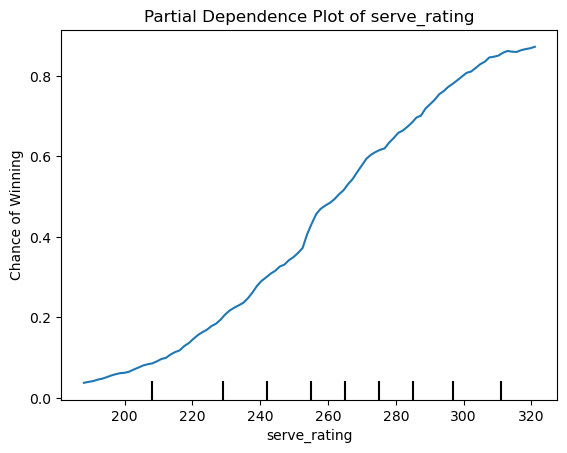

In [94]:
plot_pdp("serve_rating")

<Figure size 800x600 with 0 Axes>

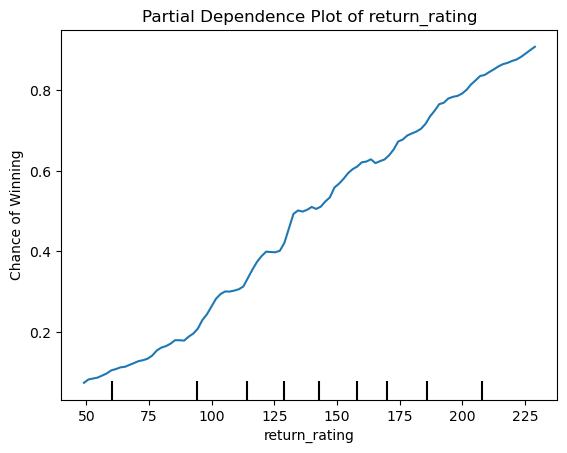

In [95]:
plot_pdp("return_rating")

### Data Analysis:
Looking at the partial dependence plots for both serve and return rating, it can be seen that both figures present an almost linear trend, demonstrating that as a player's serve and return rating increase, the chance of them winning increases linearly. 

## Conclusion: 
From all the linear regressions, we can conclude that there is no significant correlation between first serve stats and rank except for rank vs first serve points won for women's tennis. In addition, from the KNN training model, we can conclude that from the list of stats calculated, serve rating and return rating have the greatest weight in predicting a player's victory or loss. In conclusion, it seems that the most important aspect of tennis is not exactly the serve, although it does play a significant role in victories and the tennis game in general. The most important aspect of tennis is actually risk assessment. Whether you're a novice, amateur, or expert, imagine if you had a million dollars on the line, and you had to make a serve in tennis into a box. How would you hit that serve? Most people might just tap it in. What if now you not only have to get the serve in, you also have to play the point off that serve and win? That is what professional tennis players have to deal with when they are serving. They have to calculate the risk of every point. 